# importing Libarieres

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# loading dataset

In [2]:
from sklearn.datasets import fetch_california_housing
df = fetch_california_housing()

In [3]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [6]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

# 🔥 explorative data analysis

In [7]:
DataSet=pd.DataFrame(df.data, columns=df.feature_names)
DataSet

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [8]:
DataSet["price"]=df.target
DataSet

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [9]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
# summarizing the data
DataSet.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
# Missing values
DataSet.isnull()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False


In [12]:
DataSet.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [13]:
## correlation, correlations is super important in EDA, always check correlation 1st after summary stats
corr_matrix=DataSet.corr() # we use pearson correlation by default
corr_matrix*100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,100.000000,-11.903399,32.689543,-6.204013,0.483435,1.876625,-7.980913,-1.517587,68.807521
HouseAge,-11.903399,100.000000,-15.327742,-7.774728,-29.624424,1.319136,1.117267,-10.819681,10.562341
AveRooms,32.689543,-15.327742,100.000000,84.762133,-7.221285,-0.485229,10.638897,-2.754005,15.194829
AveBedrms,-6.204013,-7.774728,84.762133,100.000000,-6.619740,-0.618120,6.972113,1.334439,-4.670051
Population,0.483435,-29.624424,-7.221285,-6.619740,100.000000,6.986273,-10.878475,9.977322,-2.464968
AveOccup,1.876625,1.319136,-0.485229,-0.618120,6.986273,100.000000,0.236618,0.247582,-2.373741
Latitude,-7.980913,1.117267,10.638897,6.972113,-10.878475,0.236618,100.000000,-92.466443,-14.416028
Longitude,-1.517587,-10.819681,-2.754005,1.334439,9.977322,0.247582,-92.466443,100.000000,-4.596662
price,68.807521,10.562341,15.194829,-4.670051,-2.464968,-2.373741,-14.416028,-4.596662,100.000000


In [14]:
corr_matrix["price"].sort_values(ascending=False)

price         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: price, dtype: float64

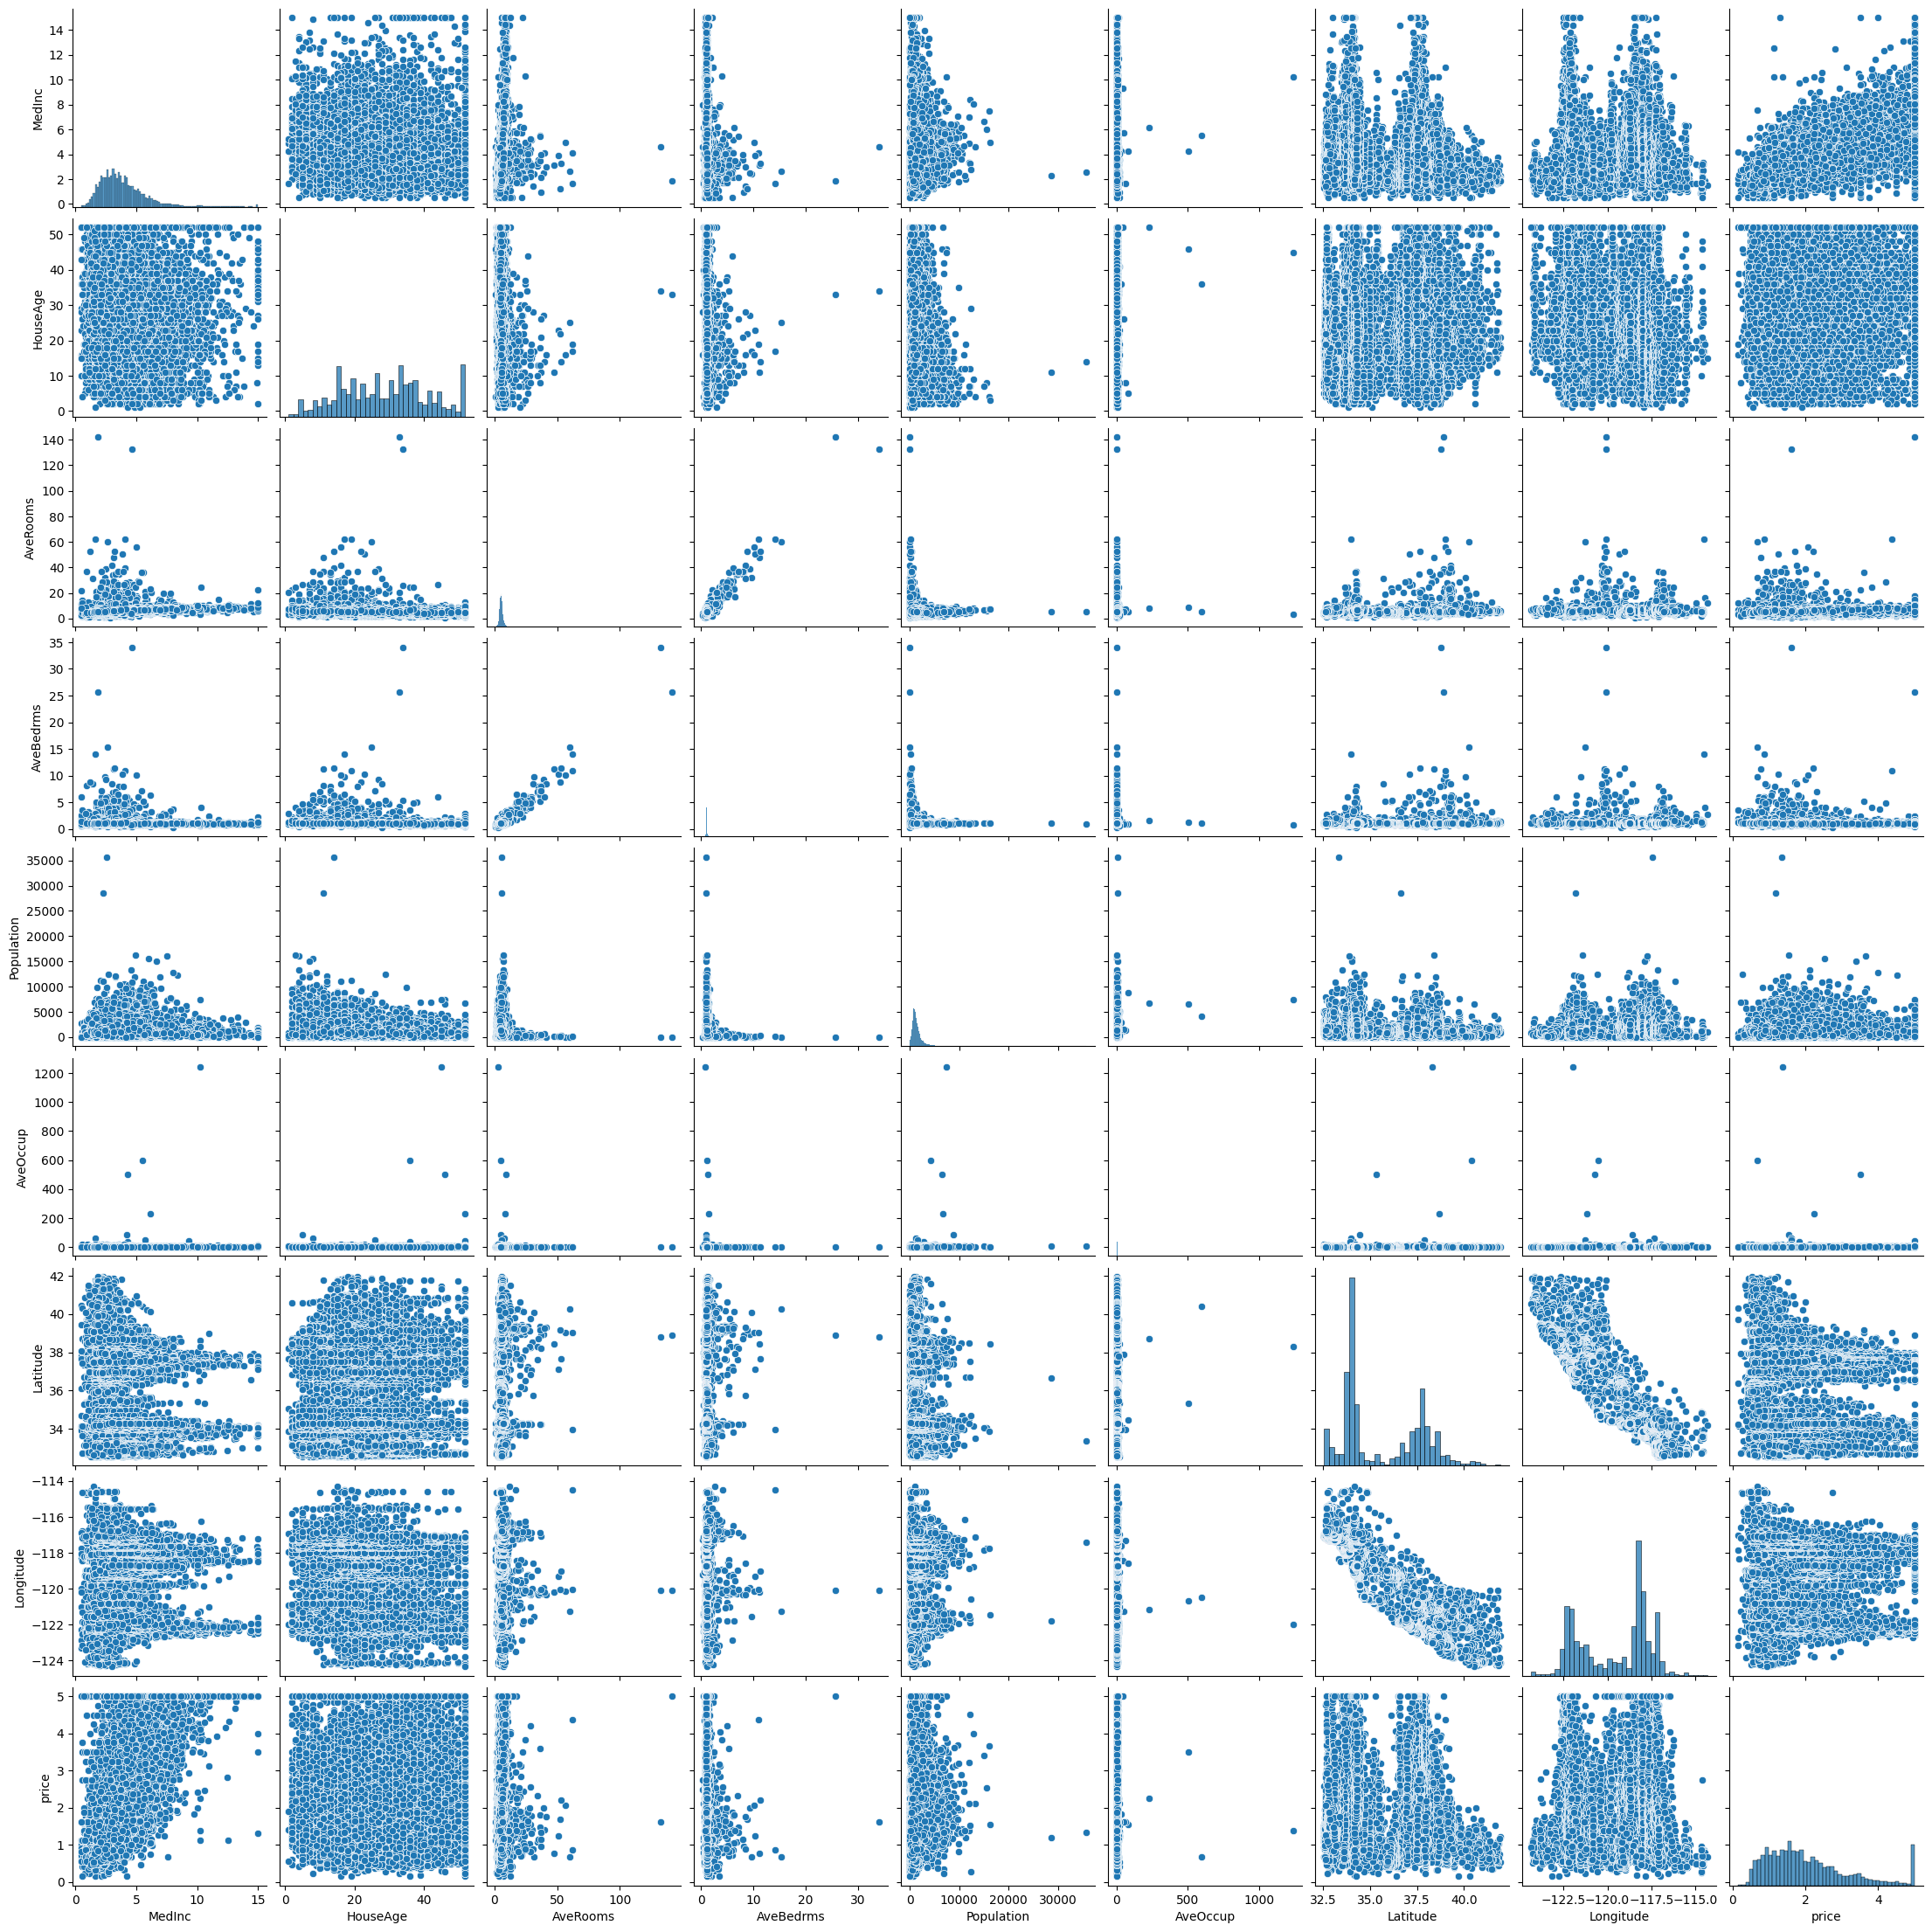

In [15]:
import seaborn as sns
sns.pairplot(DataSet)

Text(0, 0.5, 'Price')

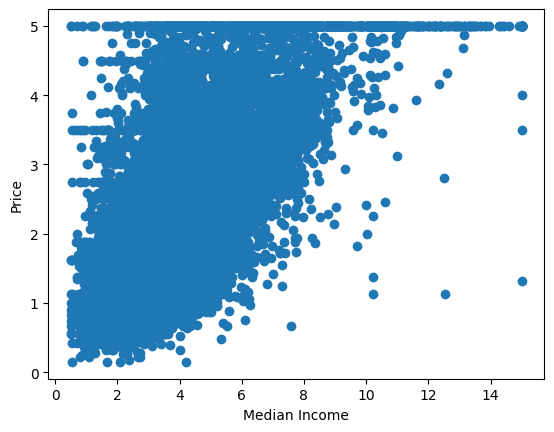

In [16]:
plt.scatter(DataSet["MedInc"],DataSet["price"])
plt.xlabel("Median Income")
plt.ylabel("Price")

<Axes: xlabel='MedInc', ylabel='price'>

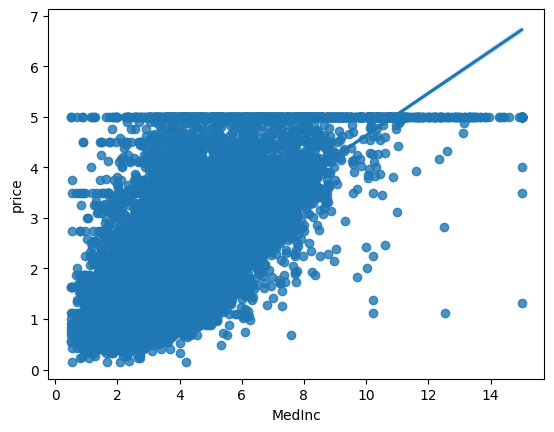

In [17]:
sns.regplot(x="MedInc", y="price", data=DataSet)

# 🔥 Preparing Datset forn Model

In [18]:
## independent and dependent features
X=DataSet.drop("price", axis=1)
y=DataSet["price"]

In [19]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [22]:
# Sacalig the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

we use standrdscaler in regression beacause:

internally we use gradient decent, our main is to come global miminima and our concern is to come global minima. and to come global we need to make sure our unts are in same scale

In [23]:
X_train=scaler.fit_transform(X_train)

In [24]:
X_test=scaler.transform(X_test)

In [25]:
import pickle
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler,f)

### ⚙️ Why We Use `fit_transform()` on Train Data and Only `transform()` on Test Data

#### 🔹 Key Points
- `fit_transform()` = `fit()` + `transform()`
  - **`fit()`** → Learns statistics (mean, std) from **training data**.  
  - **`transform()`** → Applies those statistics to scale the data.

#### 🔹 Why Not `fit_transform()` on Test Data
- Test data should **simulate unseen data** — the model must not learn anything from it.  
- Using `fit_transform()` on test data would:
  - Compute new mean and std from test data.
  - Cause **data leakage** (model indirectly "sees" test distribution).
  - Give unrealistically good evaluation results.

#### 🔹 Correct Sequence
1. `scaler.fit_transform(x_train)` → Learn and scale training data.  
2. `scaler.transform(x_test)` → Scale test data using training mean & std.  

#### 🔹 Why Order Matters
- You must `fit` on training data **before** calling `transform` on test data.  
- Otherwise, you'll get:  


# 🔥 Model traning

In [26]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [27]:
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [28]:
# printing coeff
print(model.coef_)

[ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


In [29]:
print(model.intercept_)

2.0719469373788777


In [30]:
# on which param model trained
print(model.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False, 'tol': 1e-06}


In [31]:
## predection on test data
predict=model.predict(X_test)
predict

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

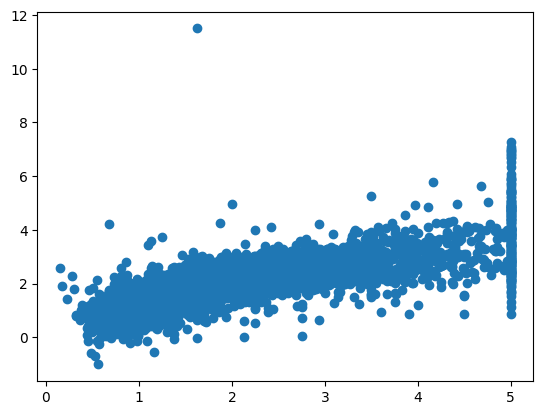

In [32]:
## Visualizing the data
plt.scatter(y_test, predict)

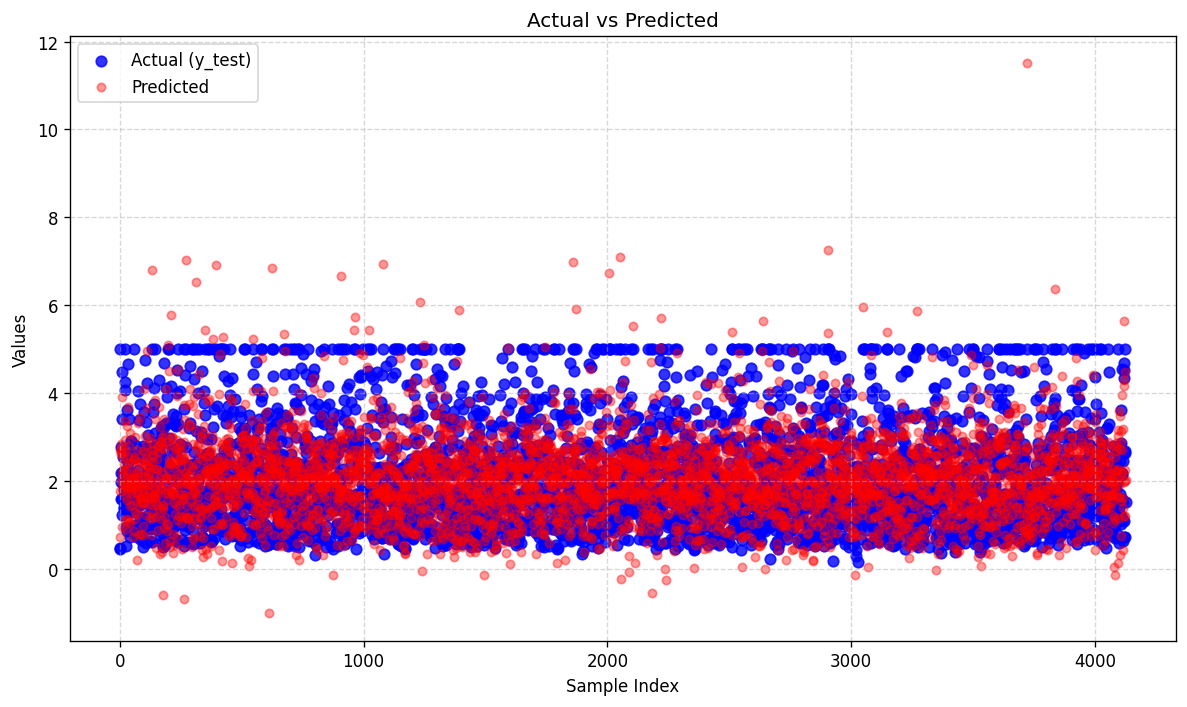

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6), dpi=120)   # Larger and sharper figure

# plot with transparency and slightly different marker sizes
plt.scatter(range(len(y_test)), y_test, 
            color='blue', label='Actual (y_test)', alpha=0.8, s=40)

plt.scatter(range(len(predict)), predict, 
            color='red', label='Predicted', alpha=0.4, s=25)

plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [34]:
# residuals
residuals=y_test - predict
residuals

20046   -0.242123
3024    -1.306017
15663    2.290351
20484   -0.652926
9814     0.175343
           ...   
15362    0.641254
16623    0.418161
18086    0.531240
2144    -0.464511
3665    -0.494403
Name: price, Length: 4128, dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Example:
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)

print(f"MAE  : {mae:.3f}")
print(f"MSE  : {mse:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R² Score : {r2:.3f}")


MAE  : 0.533
MSE  : 0.556
RMSE : 0.746
R² Score : 0.576


# 🔥predection on new data

In [36]:
df.data[0].shape

(8,)

In [37]:
val=df.data[0].reshape(1, -1)  # reshaping as we are predicting for only 1 data point

In [38]:
val

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [39]:
val=scaler.transform(val)

c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
model.predict(val)

array([4.15194269])

# 🔥 Pickling

In [41]:
import pickle
with open("house.pkl","wb") as f:
    pickle.dump(model,f)
    

In [42]:
with open("house.pkl","rb") as f:
    pickel_model=pickle.load(f)

In [43]:
pickel_model.predict(val)

array([4.15194269])